In [1]:
# Importing all needed libraries and functions
import sys
sys.path.append('../src')
from functions import *

/home/sotiriosd33/micromamba/envs/assignment_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Task 3: BMI prediction using regression models and metagenomic data

### Importing data and training the regression models

In [2]:
data_dev = data_clean('../data/assignment1_dev_set.csv')
data_val = data_clean('../data/assignment1_val_set.csv')


No NA values found.

No NA values found.


In [3]:
results_ml, feature_importances, s, winner_mod = evaluate_microbiome_models_test(data_dev, data_val, save_models=True)

Models will be saved to: /home/sotiriosd33/Desktop/Machine learning in computational biology/Assgnment_1/Assignment-1/models

=== Evaluating ElasticNet ===
Using GridSearchCV for hyperparameter optimization...


Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Saved ElasticNet model to ../models/ElasticNet_20250407_194650.joblib

=== Evaluating BayesianRidge ===
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperparameter optimization...
Using GridSearchCV for hyperpara

### Ploting the results and checking for overfitting

In [4]:
feature_importances

,Model,feature,importance
0,ElasticNet,Clostridium symbiosum,0.486423
1,ElasticNet,Ruminococcus champanellensis,0.212528
2,ElasticNet,Host age,0.208641
3,ElasticNet,Odoribacter splanchnicus,0.201584
4,ElasticNet,Eubacterium dolichum,0.199788
...,...,...,...
265,BayesianRidge,Prevotella ruminicola,0.018773
266,BayesianRidge,Lactococcus lactis,0.018227
267,BayesianRidge,Holdemania filiformis,0.017921
268,BayesianRidge,Clostridium sphenoides,0.017271


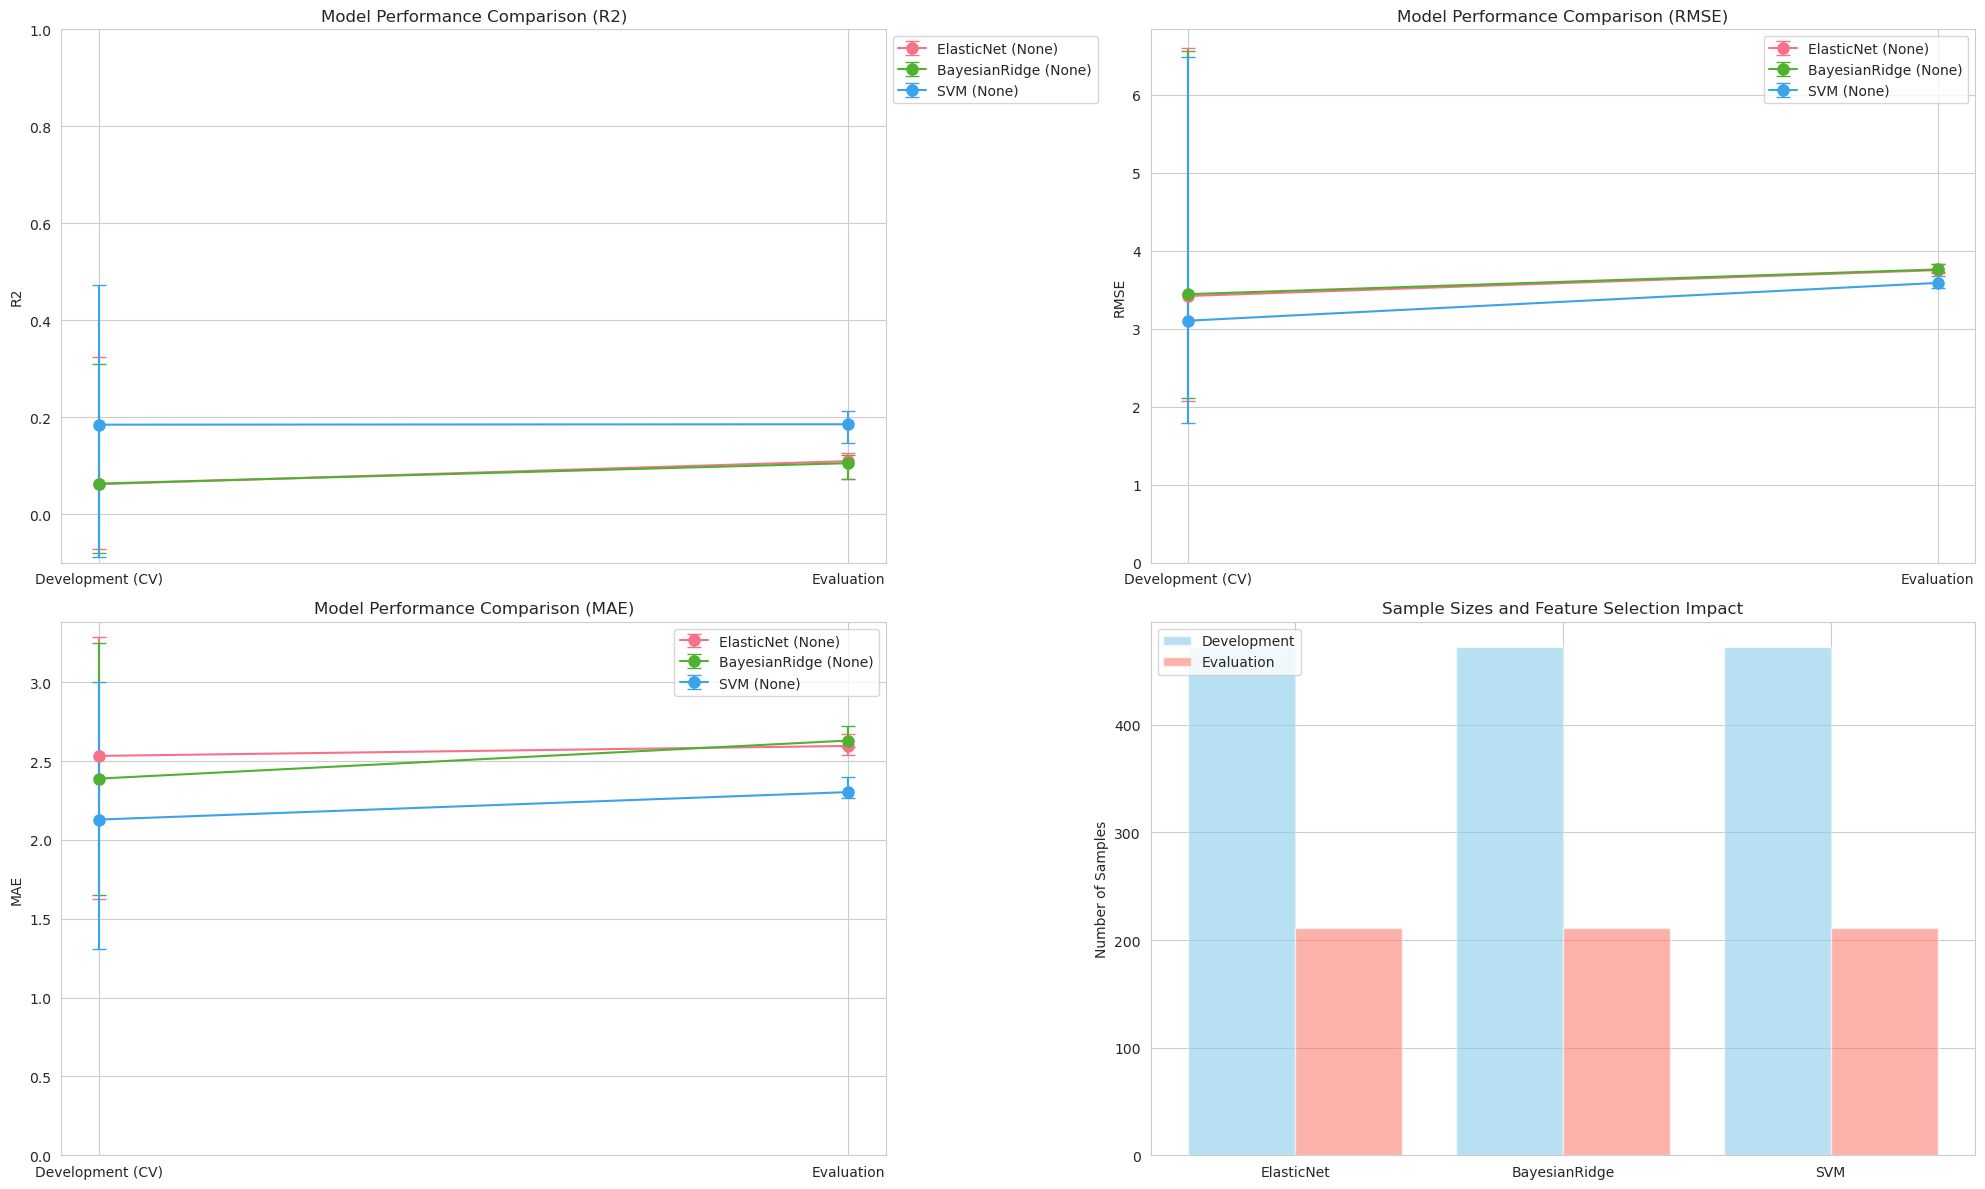


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,None,0.062 (-0.071-0.324),0.110 (0.074-0.127)
1,BayesianRidge,None,0.063 (-0.080-0.311),0.105 (0.072-0.123)
2,SVM,None,0.185 (-0.089-0.473),0.186 (0.148-0.214)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,None,3.421 (2.072-6.601),3.753 (3.717-3.828)
1,BayesianRidge,None,3.445 (2.110-6.567),3.762 (3.726-3.832)
2,SVM,None,3.105 (1.793-6.492),3.590 (3.528-3.672)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,None,2.533 (1.628-3.285),2.596 (2.540-2.672)
1,BayesianRidge,None,2.389 (1.649-3.248),2.631 (2.590-2.722)
2,SVM,None,2.129 (1.306-3.002),2.304 (2.267-2.400)


In [5]:
plot_model_results_final(results_ml)

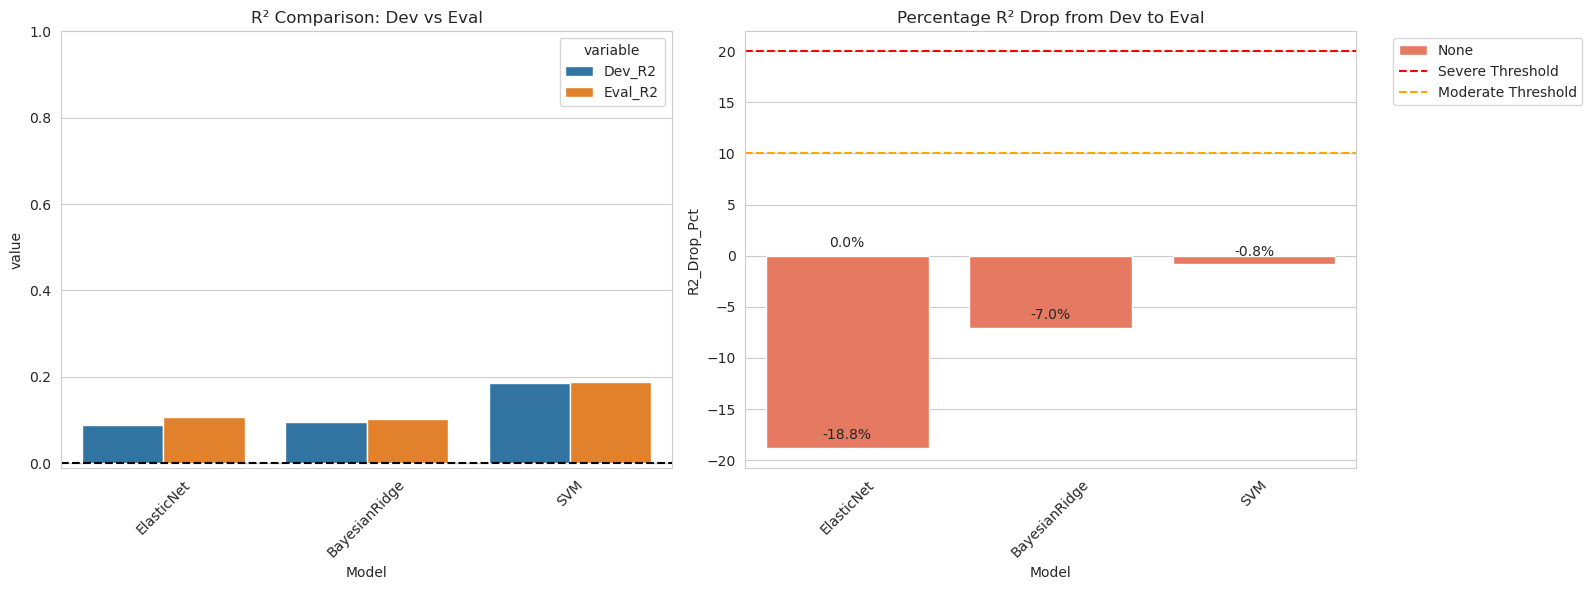

Overfitting status: none
Failed checks: []


,Model,Feature_Selection,Dev_R2,Eval_R2,R2_Drop_Pct,Dev_RMSE,Eval_RMSE,RMSE_Increase_Pct,Dev_Eval_Ratio,Overfitting_Risk
0,ElasticNet,None,0.089024,0.105769,-18.809829,3.777731,3.761394,-0.432480,0.841681,Low
1,BayesianRidge,None,0.096253,0.103023,-7.034088,3.760025,3.767184,0.190391,0.934282,Low
2,SVM,None,0.185165,0.186680,-0.818382,3.603773,3.587050,-0.464031,0.991883,Low


In [50]:
# Initialize analyzer with threshold
analyzer = OverfittingAnalyzer(threshold=0.2)

# Perform complete analysis with visualization
results = analyzer.analyze(results_ml, plot=True)

# Access analysis components
print("Overfitting status:", results['overfitting_status'])
print("Failed checks:", results['failed_checks'])
display(results['metrics'].style.background_gradient(
    subset=['R2_Drop_Pct', 'RMSE_Increase_Pct'], 
    cmap='Reds'
))

### Training on combined dev+eval dataset to produce the best overall model

In [ ]:
def evaluate_winner_model(winner_model, new_df, target_col='BMI', age_col='Host age'):
    """
    Evaluate the winner model on completely new unseen data.
    
    Parameters:
    - winner_model: The trained model object
    - new_df: DataFrame containing new data (with same structure as training data)
    - target_col: Name of target variable column
    - age_col: Name of age column
    
    Returns:
    - Dictionary of evaluation metrics
    - Predictions
    """
    # Prepare the new data (using same prepare_data function)
    X_new, y_new, _, _, _ = prepare_data(
        new_df,  # Development data (we only use first return value)
        None,    # No evaluation data needed
        target_col, 
        age_col
    )
    
    # Make predictions
    y_pred = winner_model.predict(X_new)
    
    # Calculate metrics (using same metrics as in your original evaluation)
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    
    metrics = {
        'r2': r2_score(y_new, y_pred),
        'mae': mean_absolute_error(y_new, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_new, y_pred)),
        'n_samples': len(y_new)
    }
    
    return metrics, y_pred

In [ ]:
new_data_metrics, new_predictions = evaluate_winner_model(winner_model, completely_new_df)

print("Winner model performance on new data:")
for metric, value in new_data_metrics.items():
    print(f"{metric}: {value:.4f}")